In [1]:
import tweepy
import csv
from tweepy import OAuthHandler
import string
import pandas as pd

In [2]:
# Inisialisasi API Key yang terdaftar
consumer_key = 'd5bhzGDzzT92UuVExXy3dMocG'
consumer_secret = '0sN6iy82IwMPktvNAjjJqbPx4g4lonMZAeUp425SkfjWJRtjhd'
access_token = '1099522910-TnLc4xzsZ5mrEAfy7hvfKmeScdrqBRWyGY81hq0'
access_token_secret = 'HpYiTXp2AacbrSbyqczvZWHTvasUJINq6cmzGWfVHSmqR'

In [3]:
# Autentikasi API Twitter menggunakan Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
search_words = 'covid-19'
date_since = '2021-02-27'

In [5]:
tweets = tweepy.Cursor(api.search, q=search_words, lang="id", since=date_since).items(100)
tweets

In [6]:
tweet_details = [[tweet.created_at, tweet.user.screen_name, tweet.text] for tweet in tweets]
df = pd.DataFrame(data=tweet_details, columns=["tanggal","author","isi"])
df.head()

,tanggal,author,isi
0,2021-03-02 10:39:32,kompascom,Dengan semakin banyaknya informasi seputar vak...
1,2021-03-02 10:39:30,tulus_pamuji,"RT @dausniich: Belum dilegalin Udeh ky gini, g..."
2,2021-03-02 10:39:29,NinjaCir3ng,"RT @NayDonuts: 3• Sehingga, daya beli masyarak..."
3,2021-03-02 10:39:26,galuhefrata,RT @asumsico: Tepat hari ini tahun 2020 Indone...
4,2021-03-02 10:39:24,stefanikintaan,RT @hendratno64: Genap 1 thn COVID-19 di Indon...


In [7]:
df.shape

(100, 3)

In [8]:
df

,tanggal,author,isi
0,2021-03-02 10:39:32,kompascom,Dengan semakin banyaknya informasi seputar vak...
1,2021-03-02 10:39:30,tulus_pamuji,"RT @dausniich: Belum dilegalin Udeh ky gini, g..."
2,2021-03-02 10:39:29,NinjaCir3ng,"RT @NayDonuts: 3• Sehingga, daya beli masyarak..."
3,2021-03-02 10:39:26,galuhefrata,RT @asumsico: Tepat hari ini tahun 2020 Indone...
4,2021-03-02 10:39:24,stefanikintaan,RT @hendratno64: Genap 1 thn COVID-19 di Indon...
...,...,...,...
95,2021-03-02 10:36:41,atikahisa_,"RT @viralperak: TERKINI: 1,555 kes baharu COVI..."
96,2021-03-02 10:36:40,roslan_rungan,RT @JPenerangan: Pemakaian pelitup muka dengan...
97,2021-03-02 10:36:39,SayaBerani_id,Rekomendasi asosiasi medis HIV Eropa tersebut ...
98,2021-03-02 10:36:38,AnadoluAgencyID,#BREAKING: Malaysia catat 1.555 infeksi Covid-...


In [9]:
import re
def clean_tweets(isi):
  isi = re.sub('RT @[\w]*:','',isi)
  isi = re.sub('@[\w]*:','',isi)
  isi = re.sub('https?://[A-Za-z0-9./]*','',isi)
  isi = re.sub('\n','',isi)
  isi = isi.lower()
  return isi
df['isi'] = df['isi'].apply(lambda x: clean_tweets(x))
df.head(20)


,tanggal,author,isi
0,2021-03-02 10:39:32,kompascom,dengan semakin banyaknya informasi seputar vak...
1,2021-03-02 10:39:30,tulus_pamuji,"belum dilegalin udeh ky gini, gmn klo udeh le..."
2,2021-03-02 10:39:29,NinjaCir3ng,"3• sehingga, daya beli masyarakat terus menin..."
3,2021-03-02 10:39:26,galuhefrata,tepat hari ini tahun 2020 indonesia melaporka...
4,2021-03-02 10:39:24,stefanikintaan,genap 1 thn covid-19 di indonesia. visualisas...
5,2021-03-02 10:39:20,Beritasatu,epidemiolog peringatkan kecepatan penularan da...
6,2021-03-02 10:39:16,hazelnutqq,"awal-awal covid-19 di indonesia, masker langk..."
7,2021-03-02 10:39:12,brawnichoc,ready kuota indosat 50gb ‼️freedom internet 50...
8,2021-03-02 10:39:12,JaPenWPKL,🔶 ppr laksamana 2fokus penyampaian maklumat :📌...
9,2021-03-02 10:39:11,hazelnutqq,happy 1st anniversary covid-19 di indonesia2 ...


In [10]:
def gen_freq(isi):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in isi.split():
        word_list.extend(tw_words)
   #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(df.isi.str)

covid-19          47
di                39
maret             27
kasus             23
dan               22
                  ..
selalu             1
menyerahjangan     1
per                1
jangan             1
unit               1
Length: 710, dtype: int64

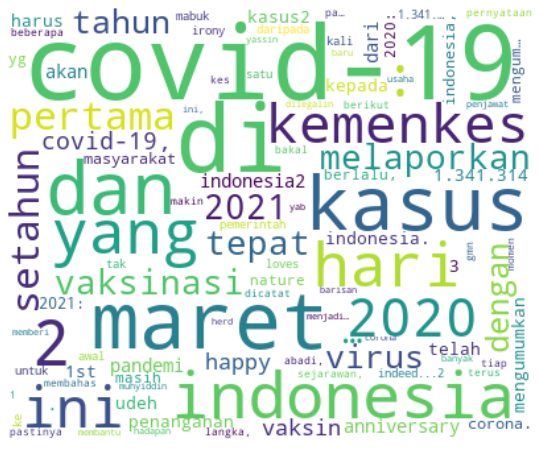

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq = gen_freq(df.isi.str)
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize =(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('indonesian')
print(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatan

In [13]:
def clean_text(isi):
  isi = isi.lower()
  return isi

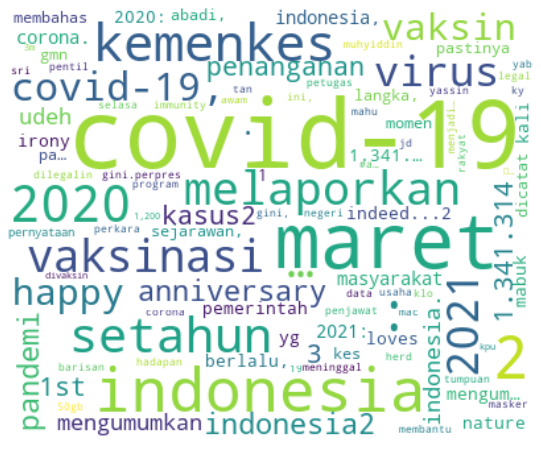

In [14]:
text = df.isi.apply(lambda x: clean_text(x))
word_freq = gen_freq(df.isi.str)*100
word_freq = word_freq.drop(labels=stopword, errors='ignore')


wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize =(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [15]:
pip install googletrans==4.0.0-rc1

In [16]:
from googletrans import Translator
translator = Translator()
df['text'] = df['isi'].apply(translator.translate, src='id', dest='en').apply(getattr, args=('text',))
df

,tanggal,author,isi,text
0,2021-03-02 10:39:32,kompascom,dengan semakin banyaknya informasi seputar vak...,With more and more information about the covid...
1,2021-03-02 10:39:30,tulus_pamuji,"belum dilegalin udeh ky gini, gmn klo udeh le...","it hasn't been legalized yet like this, how co..."
2,2021-03-02 10:39:29,NinjaCir3ng,"3• sehingga, daya beli masyarakat terus menin...","3 • so, people's purchasing power continues to..."
3,2021-03-02 10:39:26,galuhefrata,tepat hari ini tahun 2020 indonesia melaporka...,Right today in 2020 Indonesia reports the firs...
4,2021-03-02 10:39:24,stefanikintaan,genap 1 thn covid-19 di indonesia. visualisas...,even 1 year covid-19 in Indonesia.visualizatio...
...,...,...,...,...
95,2021-03-02 10:36:41,atikahisa_,"terkini: 1,555 kes baharu covid-19 hari ini. ...","most recent: 1,555 cases new Covid-19 today.si..."
96,2021-03-02 10:36:40,roslan_rungan,pemakaian pelitup muka dengan cara yang betul...,The use of covers in the right way is very imp...
97,2021-03-02 10:36:39,SayaBerani_id,rekomendasi asosiasi medis hiv eropa tersebut ...,The recommendations of the European HIV medica...
98,2021-03-02 10:36:38,AnadoluAgencyID,#breaking: malaysia catat 1.555 infeksi covid-...,"#breaking: Malaysia recorded 1,555 Covid-19 in..."


In [17]:
from textblob import TextBlob
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create 2 kolom
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

#show the new dataframe
df

,tanggal,author,isi,text,Subjectivity,Polarity
0,2021-03-02 10:39:32,kompascom,dengan semakin banyaknya informasi seputar vak...,With more and more information about the covid...,0.533333,0.333333
1,2021-03-02 10:39:30,tulus_pamuji,"belum dilegalin udeh ky gini, gmn klo udeh le...","it hasn't been legalized yet like this, how co...",0.400000,0.400000
2,2021-03-02 10:39:29,NinjaCir3ng,"3• sehingga, daya beli masyarakat terus menin...","3 • so, people's purchasing power continues to...",0.066667,-0.166667
3,2021-03-02 10:39:26,galuhefrata,tepat hari ini tahun 2020 indonesia melaporka...,Right today in 2020 Indonesia reports the firs...,0.434524,0.267857
4,2021-03-02 10:39:24,stefanikintaan,genap 1 thn covid-19 di indonesia. visualisas...,even 1 year covid-19 in Indonesia.visualizatio...,0.375000,-0.125000
...,...,...,...,...,...,...
95,2021-03-02 10:36:41,atikahisa_,"terkini: 1,555 kes baharu covid-19 hari ini. ...","most recent: 1,555 cases new Covid-19 today.si...",0.401515,0.212121
96,2021-03-02 10:36:40,roslan_rungan,pemakaian pelitup muka dengan cara yang betul...,The use of covers in the right way is very imp...,0.767857,0.402857
97,2021-03-02 10:36:39,SayaBerani_id,rekomendasi asosiasi medis hiv eropa tersebut ...,The recommendations of the European HIV medica...,0.183333,0.116667
98,2021-03-02 10:36:38,AnadoluAgencyID,#breaking: malaysia catat 1.555 infeksi covid-...,"#breaking: Malaysia recorded 1,555 Covid-19 in...",0.750000,0.000000


In [18]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else :
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,tanggal,author,isi,text,Subjectivity,Polarity,Analysis
0,2021-03-02 10:39:32,kompascom,dengan semakin banyaknya informasi seputar vak...,With more and more information about the covid...,0.533333,0.333333,Positive
1,2021-03-02 10:39:30,tulus_pamuji,"belum dilegalin udeh ky gini, gmn klo udeh le...","it hasn't been legalized yet like this, how co...",0.400000,0.400000,Positive
2,2021-03-02 10:39:29,NinjaCir3ng,"3• sehingga, daya beli masyarakat terus menin...","3 • so, people's purchasing power continues to...",0.066667,-0.166667,Negative
3,2021-03-02 10:39:26,galuhefrata,tepat hari ini tahun 2020 indonesia melaporka...,Right today in 2020 Indonesia reports the firs...,0.434524,0.267857,Positive
4,2021-03-02 10:39:24,stefanikintaan,genap 1 thn covid-19 di indonesia. visualisas...,even 1 year covid-19 in Indonesia.visualizatio...,0.375000,-0.125000,Negative
...,...,...,...,...,...,...,...
95,2021-03-02 10:36:41,atikahisa_,"terkini: 1,555 kes baharu covid-19 hari ini. ...","most recent: 1,555 cases new Covid-19 today.si...",0.401515,0.212121,Positive
96,2021-03-02 10:36:40,roslan_rungan,pemakaian pelitup muka dengan cara yang betul...,The use of covers in the right way is very imp...,0.767857,0.402857,Positive
97,2021-03-02 10:36:39,SayaBerani_id,rekomendasi asosiasi medis hiv eropa tersebut ...,The recommendations of the European HIV medica...,0.183333,0.116667,Positive
98,2021-03-02 10:36:38,AnadoluAgencyID,#breaking: malaysia catat 1.555 infeksi covid-...,"#breaking: Malaysia recorded 1,555 Covid-19 in...",0.750000,0.000000,Neutral


In [19]:
#print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['isi'][i])
        print()
        j = j+1

1) dengan semakin banyaknya informasi seputar vaksin covid-19, twitter mencegah informasi sesat soal vaksin berbedar d… 

2)  belum dilegalin udeh ky gini, gmn klo udeh legal makin banyak yg ke gini.perpres mabuk pentil jd covid-19 di indonesia, #a…

3)  tepat hari ini tahun 2020 indonesia melaporkan kasus pertama virus corona. setahun berlalu, indonesia telah melaporkan 1.341.…

4)  awal-awal covid-19 di indonesia, masker langka, hand sanitizer langka, kebijakan ngalor ngidul hadehh 

5) ready kuota indosat 50gb ‼️freedom internet 50gb = 75k ‼️freedom combo 50gb = 75k☁️proses cepat 1-15menit ☁️t… 

6)  happy 1st anniversary covid-19 di indonesia2 maret 2020 : 3 kasus2 maret 2021 : 1.341.314 kasus …

7) update selasa 2 maret 2021: 1.347.026 positif covid-19, sembuh 1.160.863, meninggal 36.518  

8)  nature loves irony indeed...2 maret 2020: kemenkes mengumumkan 2 kasus pertama covid-19 2 maret 2021: kemenkes mengum…

9) setahun covid-19, dasco apresiasi pemerintah sudah bisa memasukkan

In [20]:
#print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['isi'][i])
        print()
        j = j+1

1)  3• sehingga, daya beli masyarakat terus meningkat,supply dan demand harus dibangkitkan bersama. tak kurang, 85,5% masyara…

2)  genap 1 thn covid-19 di indonesia. visualisasi jml meninggal akumulasi akibat covid-19 selama 12 bln per prov (update: 1/3…

3) @masssedi sialnya, kedatangan covid-19 di indonesia juga menandakan tanggal lahirku.

4) giliran guru di balikpapan divaksin covid-19, tiada penolakan dan efek samping 

5) yuk mari mencegah daripada mengobaticovid-19 di indonesia setidaknya kita harus patuhi protokol kesehatan danter… 

6)  terdapat 24,563 kes aktif dengan 96 daripada 204 pesakit di unit rawatan rapi memerlukan bantuan pernafasan. #fmtnews #covid19…

7)  3• sehingga, daya beli masyarakat terus meningkat,supply dan demand harus dibangkitkan bersama. tak kurang, 85,5% masyara…

8) teori konspirasi virus corona mewarnai setahun pandemi covid-19 di dunia. tak sedikit orang, bahkan di indonesia ya… 

9)  10 juta bahan baku vaksin covid-19 datang lagi, bio farma: masih

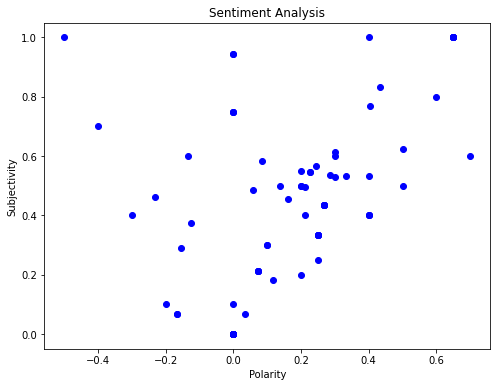

In [21]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [22]:
#get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['isi']

round( (ptweets.shape[0]/df.shape[0])*100,1)

54.0

In [23]:
#get the percentage of positive tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['isi']

round( (ntweets.shape[0]/df.shape[0])*100,1)

10.0